# We happen to have a run finished already, so we can load and explore the model data from there as well

In [1]:
import xarray as xr
import zarr
import matplotlib.pyplot as plt
import numpy as np
from cartopy import crs as ccrs
from fv3viz import pcolormesh_cube

We can look at the column-integrated water vapor and it's evolution over the model run:

(6, 24, 24, 79)


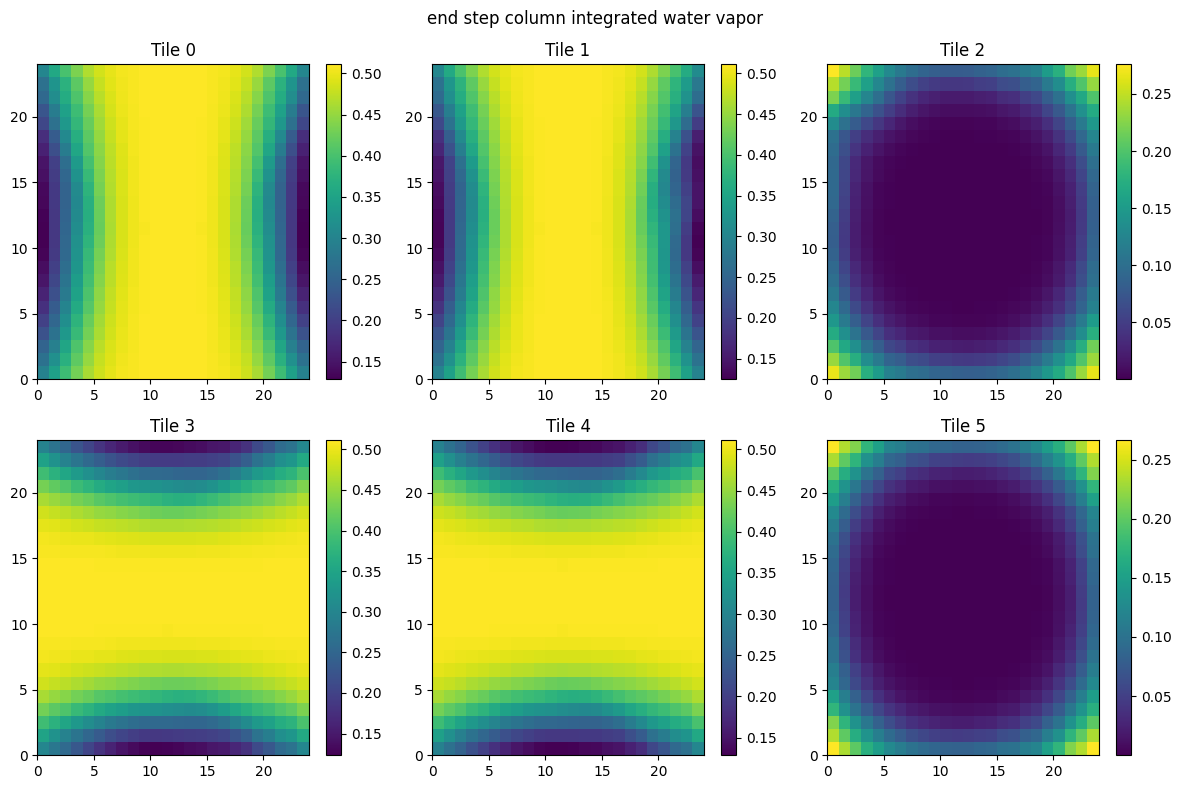

Text(0.5, 1.0, 'Column-Integrated Water Vapor Evolution (24 x 24 points per tile)')

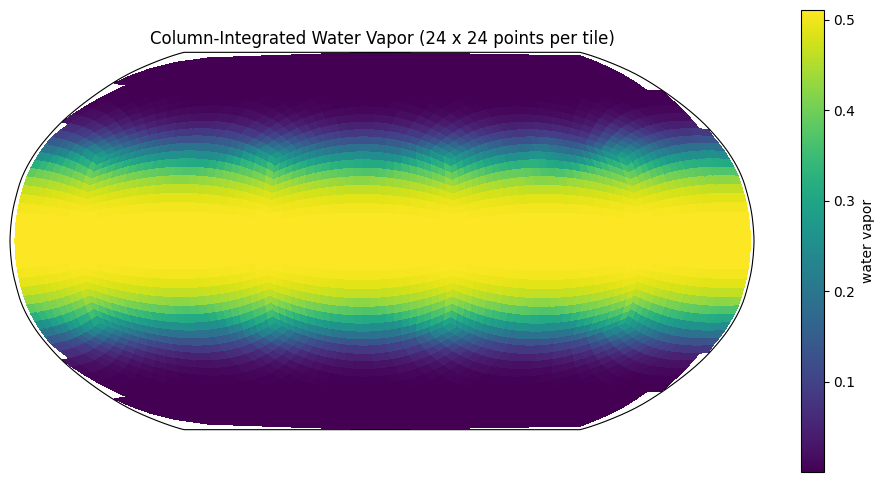

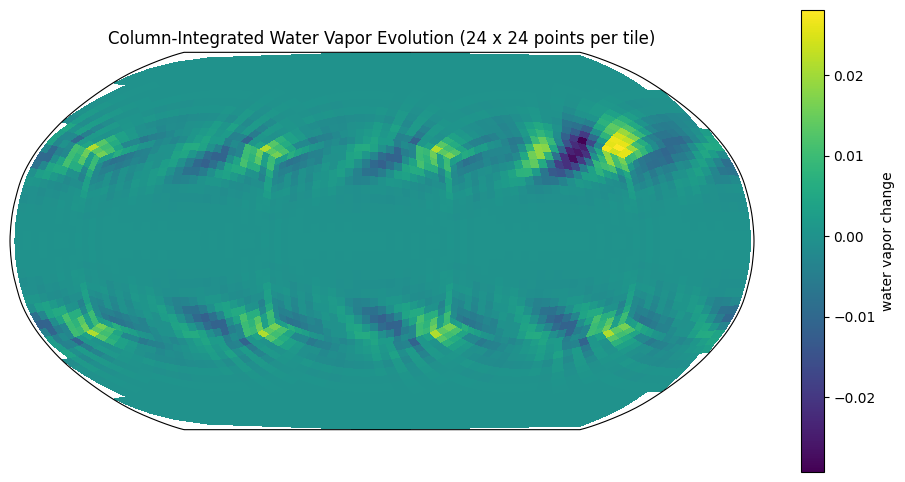

In [3]:
ds = xr.open_zarr(store=zarr.DirectoryStore(path="prior_output.zarr"), consolidated=False)

print(ds["qvapor"].isel(time=-1).values.shape)

fig, ax = plt.subplots(2, 3, figsize=(12, 8))
ax = ax.flatten()
level = -1
varname = "qvapor"
for i in range(6):
    column_q = (
        np.sum(ds[varname].isel(time=-1, tile=i).values, axis=-1)
    )
    im = ax[i].pcolormesh(column_q)
    ax[i].set_title(f"Tile {i}")
    plt.colorbar(im, ax=ax[i])
fig.suptitle("end step column integrated water vapor")
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection=ccrs.Robinson())
f1 = pcolormesh_cube(
    ds["lat"].values * 180./np.pi,
    ds["lon"].values * 180./np.pi,
    np.sum(ds["qvapor"].isel(time=-1).values, axis=-1),
    cmap="viridis",
)
plt.colorbar(f1, label="water vapor")
ax.set_title(f"Column-Integrated Water Vapor ({24} x {24} points per tile)")

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection=ccrs.Robinson())
f1 = pcolormesh_cube(
    ds["lat"].values * 180./np.pi,
    ds["lon"].values * 180./np.pi,
    np.sum(ds["qvapor"].isel(time=-1).values, axis=-1) - np.sum(ds["qvapor"].isel(time=1).values, axis=-1),
    cmap="viridis",
)
plt.colorbar(f1, label="water vapor change")
ax.set_title(f"Column-Integrated Water Vapor Evolution ({24} x {24} points per tile)")

We can also look at the temperature at each atmospheric level:

Text(0.5, 1.0, 'Column-Integrated Water Vapor Evolution (24 x 24 points per tile)')

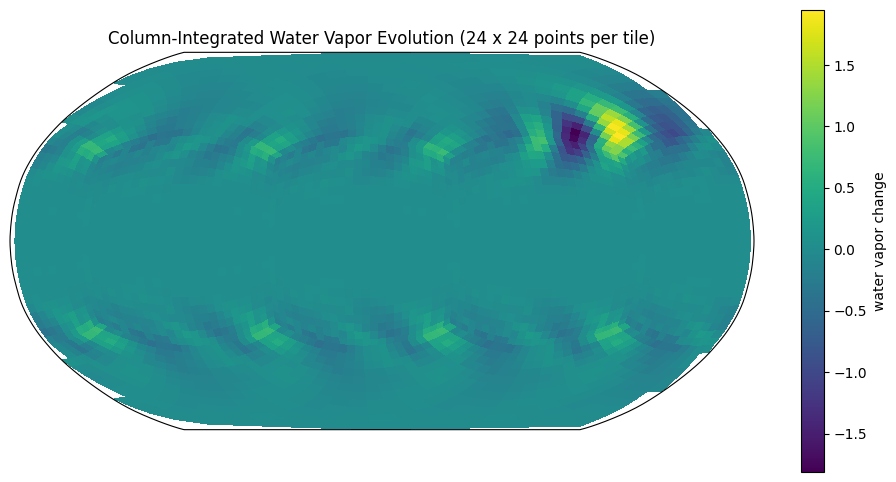

In [4]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection=ccrs.Robinson())
f1 = pcolormesh_cube(
    ds["lat"].values * 180./np.pi,
    ds["lon"].values * 180./np.pi,
    (ds["pt"].isel(time=-1, z=65).values - ds["pt"].isel(time=1, z=65).values),
    cmap="viridis",
)
plt.colorbar(f1, label="change in temperature (K)")
ax.set_title(f"Change in 850 hPa Temperature ({24} x {24} points per tile)")